In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

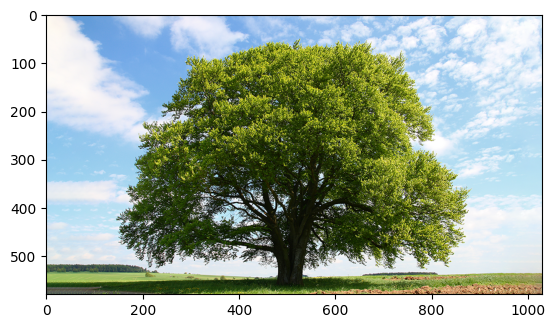

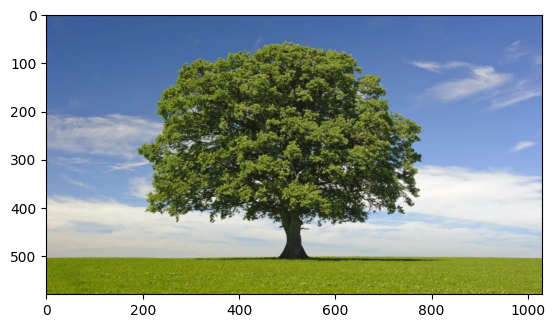

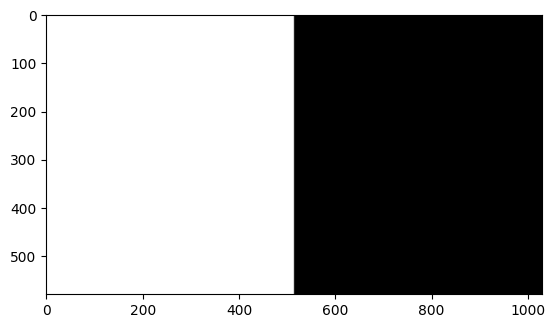

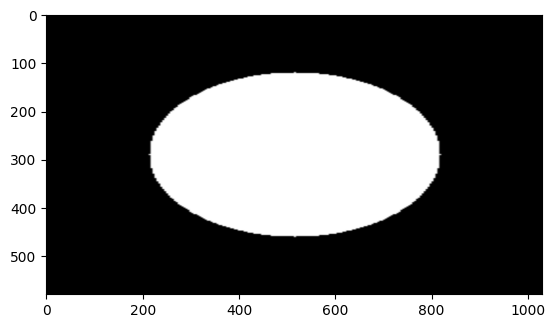

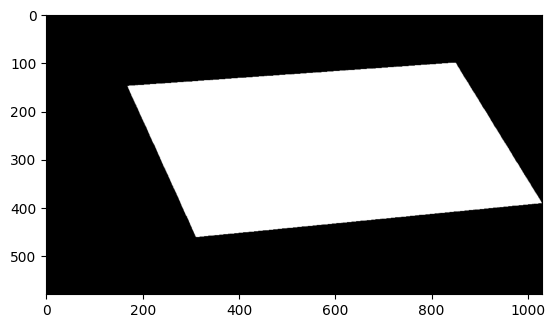

In [6]:
image = cv.imread("trees1.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)/255
plt.imshow(image)
plt.show()

image2 = cv.imread("trees2.jpg")
image2 = cv.resize(image2, (image.shape[1],image.shape[0]))
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)/255
plt.imshow(image2)
plt.show()

mask = cv.imread("mask.png")
mask = cv.resize(mask, (image.shape[1],image.shape[0]))
mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

circle = cv.imread("circle.png")
circle = cv.resize(circle, (image.shape[1],image.shape[0]))
circle = cv.cvtColor(circle, cv.COLOR_BGR2RGB)
plt.imshow(circle)
plt.show()

square = cv.imread("square.jpg")
square = cv.resize(square, (image.shape[1],image.shape[0]))
square = cv.cvtColor(square, cv.COLOR_BGR2RGB)
plt.imshow(square)
plt.show()

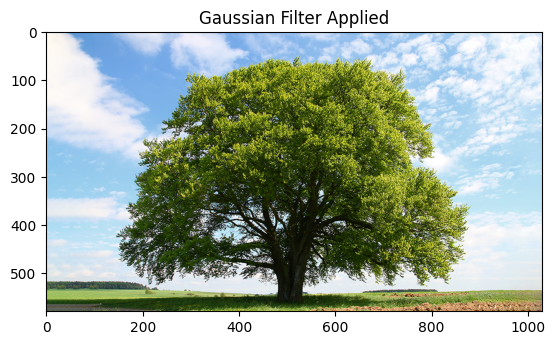

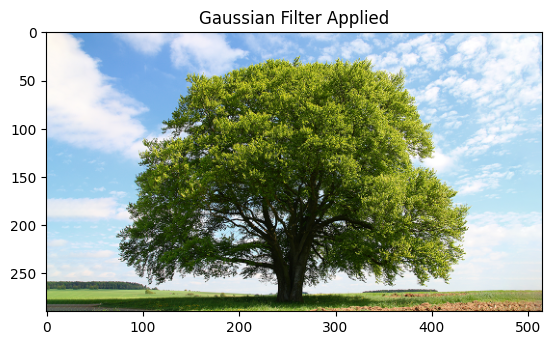

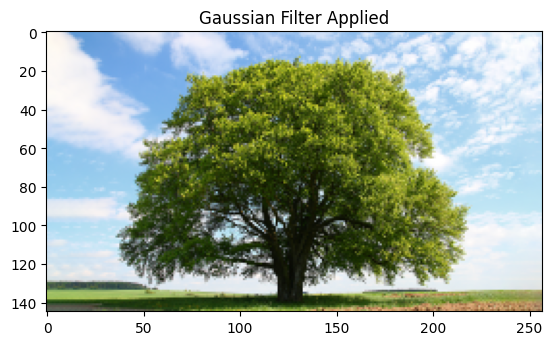

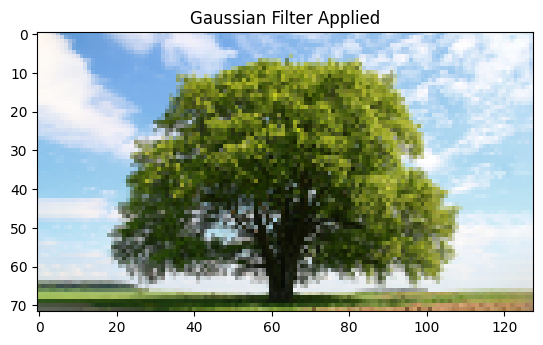

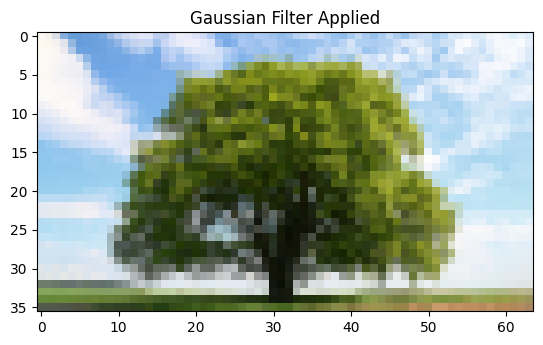

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7778622645957798..0.828122636383655].


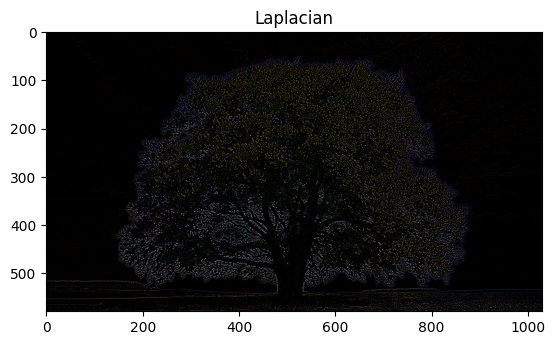

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7003330102174264..0.7931448798229108].


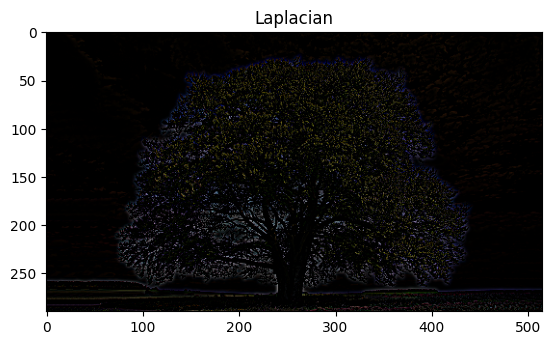

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5691661698917154..0.7194236943722792].


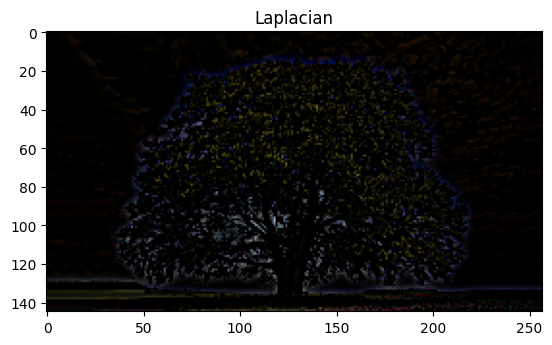

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4065720166392838..0.6520140625644435].


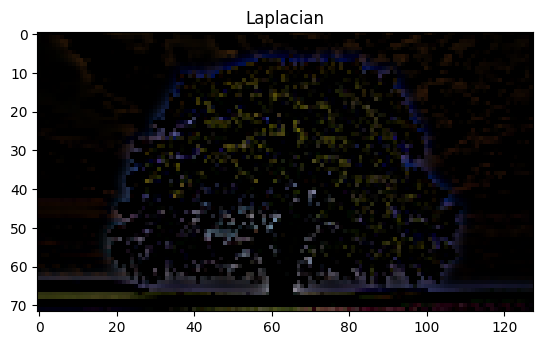

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5660961899555549..1.7808620375866195].


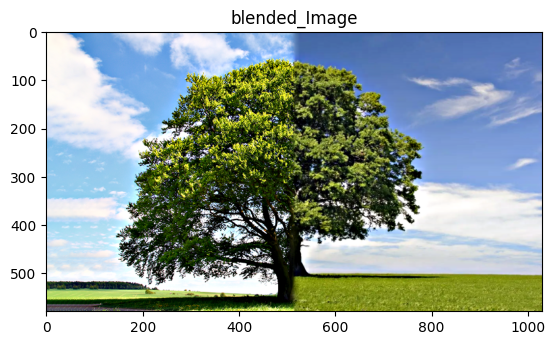

In [7]:
#Lab 3 Task 1
imagePyr = [image]
imageLap = []


plt.imshow(image)
plt.title("Gaussian Filter Applied")
plt.show()

for i in range(4):
    Gaussian = cv.GaussianBlur(image, (7, 7), 0) 
    reduced_size = (image.shape[1]//2, image.shape[0]//2)
    image = cv.resize(image,reduced_size)
    #image = cv.pyrDown(image)
    imagePyr.append(image)

    plt.imshow(image)
    plt.title("Gaussian Filter Applied")
    plt.show()

for i in range(len(imagePyr) - 1):
    size_next = (imagePyr[i].shape[1], imagePyr[i].shape[0])
    #imageDiff = imagePyr[i+1] - cv.resize(imagePyr[i], size_next)
    imageDiff = imagePyr[i] - cv.GaussianBlur(cv.resize(imagePyr[i+1], size_next), (7, 7), 0)
    imageLap.insert(0,imageDiff)

    plt.imshow(imageDiff)
    plt.title("Laplacian")
    plt.show()


#Lab 3 Task 2
image2Pyr = [image2]
image2Lap = []
maskPyr = [mask]

for i in range(4):
    reduced_size = (image2.shape[1]//2, image2.shape[0]//2)

    Gaussian = cv.GaussianBlur(image2, (7, 7), 0) 
    image2 = cv.resize(image2,reduced_size)
    #image2 = cv.pyrDown(image2)
    image2Pyr.append(image2)

    Gaussian = cv.GaussianBlur(mask, (7, 7), 0) 
    mask = cv.resize(mask,reduced_size)
    #mask = cv.pyrDown(mask)
    maskPyr.insert(0,mask)
    
    #plt.imshow(image)
    #plt.title("Gaussian Filter Applied")
    #plt.show()

for i in range(len(imagePyr) - 1):
    size_next = (imagePyr[i].shape[1], imagePyr[i].shape[0])
    #image2Diff = image2Pyr[i+1] - cv.resize(image2Pyr[i], size_next)
    image2Diff = image2Pyr[i] - cv.GaussianBlur(cv.resize(image2Pyr[i+1], size_next), (7, 7), 0)
    image2Lap.insert(0,image2Diff)


blended = np.zeros(image.shape)
blendedImage = np.float32(imagePyr[4]*(maskPyr[0]/255) + image2Pyr[4]*(1-(maskPyr[0]/255)))

for i in range(len(imageLap)):
    size = (imageLap[i].shape[1], imageLap[i].shape[0])
    currentMask = maskPyr[i+1]/255

    blendedImage = cv.resize(blendedImage, size)
    blended = imageLap[i]*currentMask + image2Lap[i]*(1 - currentMask)

    blendedImage = blendedImage + blended


plt.imshow(blendedImage)
plt.title("blended_Image")
plt.show()


#Lab 3 Task 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06419497055100776..1.0925969748384525].


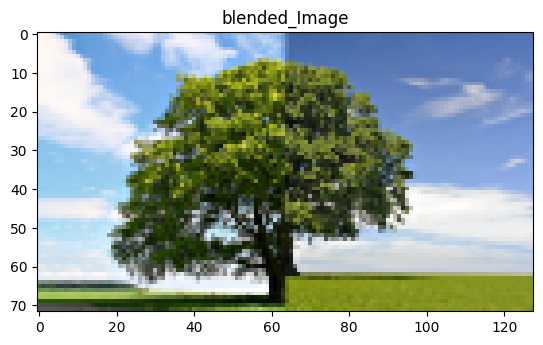

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19289039633935254..1.3261351299437316].


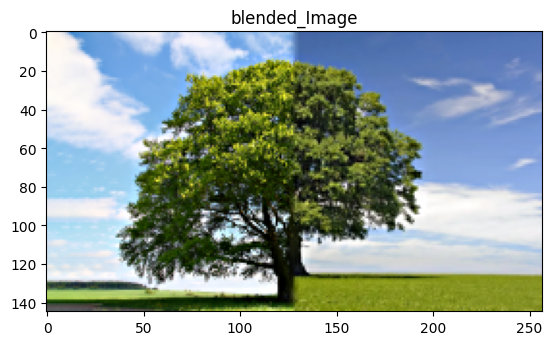

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4034440161732361..1.4811418154480263].


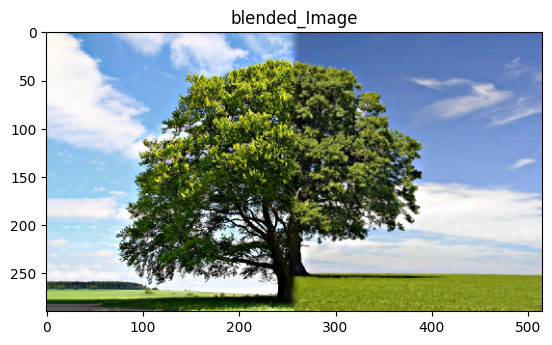

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43180515568026945..1.5512464300845112].


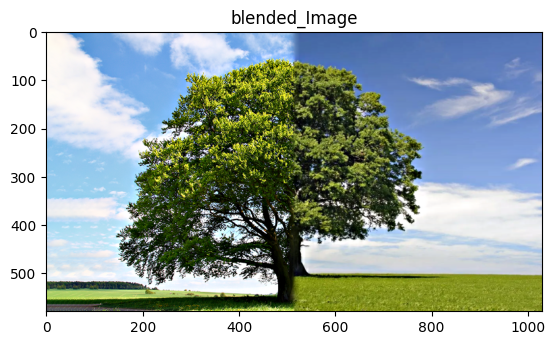

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04249411135697573..1.106576878200761].


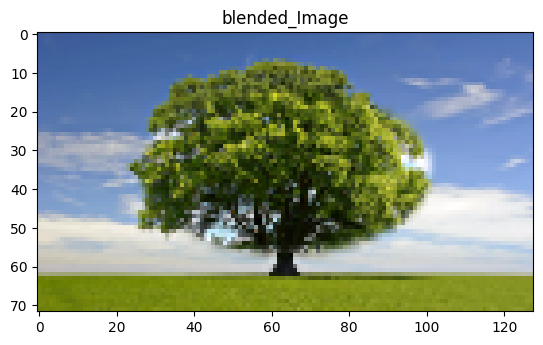

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16179104271448344..1.3261351299437316].


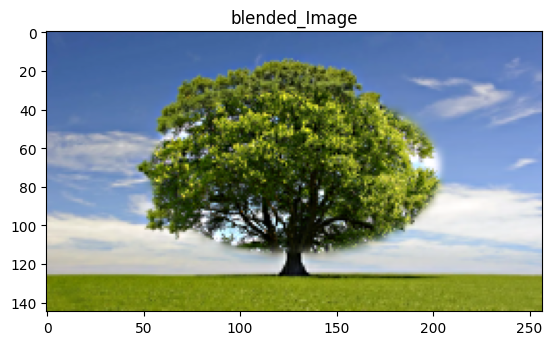

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4034440161732361..1.4811418154480263].


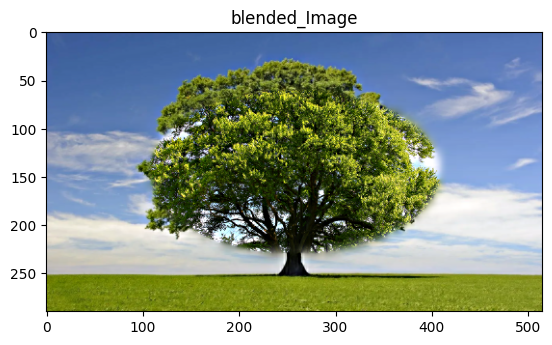

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43180515568026945..1.683125583197642].


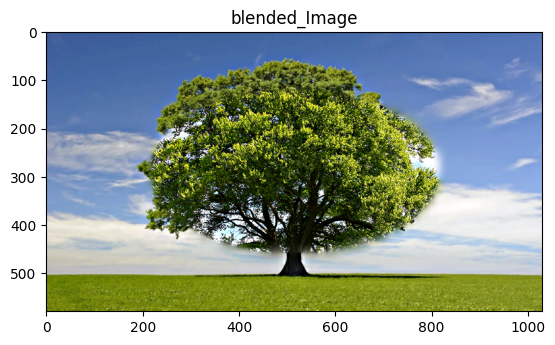

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04249411135697573..1.106576878200761].


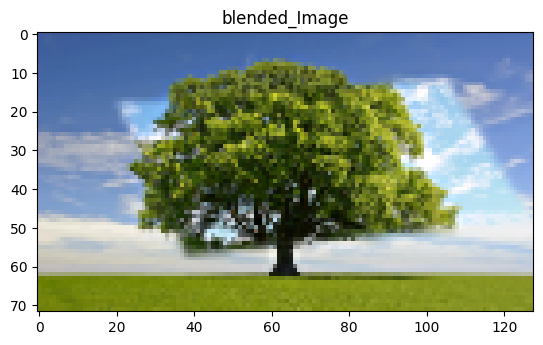

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17160021355376515..1.3261351299437316].


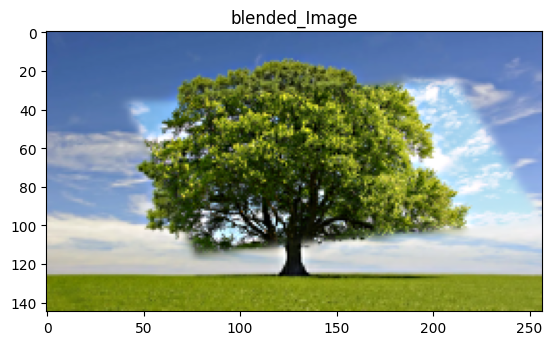

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4034440161732361..1.4811418154480263].


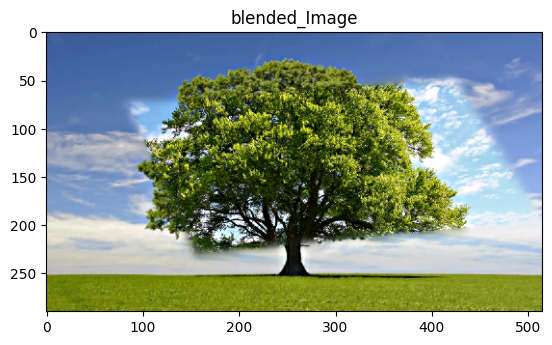

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43180515568026945..1.5643425829170816].


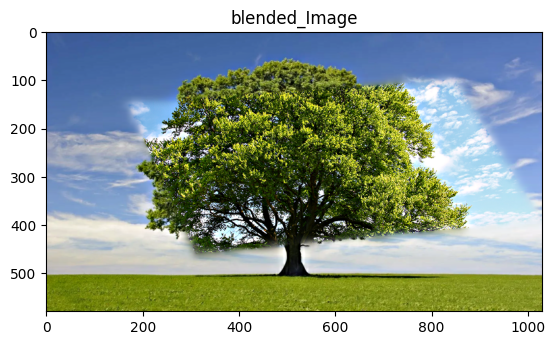

'for item in imagePyr:\n    plt.imshow(item)\n    plt.title("Gaussian Filter Applied")\n    plt.show()\n\nfor item in image2Pyr:\n    plt.imshow(item)\n    plt.title("Gaussian Filter Applied")\n    plt.show()\n\nfor item in maskPyr:\n    plt.imshow(item)\n    plt.title("Gaussian Filter Applied")\n    plt.show()'

In [80]:
#Lab 4 Task 1
imagePyr = [image]
imageLap = []
image2Pyr = [image2]
image2Lap = []
maskPyr = [mask]
circlePyr = [circle]
squarePyr = [square]

for i in range(4):
    Gaussian = cv.GaussianBlur(image, (7, 7), 0) 
    reduced_size = (image.shape[1]//2, image.shape[0]//2)
    image = cv.resize(image,reduced_size)
    #image = cv.pyrDown(image)
    imagePyr.append(image)

    Gaussian = cv.GaussianBlur(image2, (7, 7), 0) 
    image2 = cv.resize(image2,reduced_size)
    #image2 = cv.pyrDown(image2)
    image2Pyr.append(image2)

    Gaussian = cv.GaussianBlur(mask, (7, 7), 0) 
    mask = cv.resize(mask,reduced_size)
    #mask = cv.pyrDown(mask)
    maskPyr.insert(0,mask)


    Gaussian = cv.GaussianBlur(circle, (7, 7), 0) 
    circle = cv.resize(circle,reduced_size)
    #mask = cv.pyrDown(mask)
    circlePyr.insert(0,circle)

    Gaussian = cv.GaussianBlur(square, (7, 7), 0) 
    square = cv.resize(square,reduced_size)
    #mask = cv.pyrDown(mask)
    squarePyr.insert(0,square)
    
    #plt.imshow(image)
    #plt.title("Gaussian Filter Applied")
    #plt.show()

for i in range(len(imagePyr) - 1):
    size_next = (imagePyr[i].shape[1], imagePyr[i].shape[0])
    #imageDiff = imagePyr[i+1] - cv.resize(imagePyr[i], size_next)
    imageDiff = imagePyr[i] - cv.GaussianBlur(cv.resize(imagePyr[i+1], size_next), (7, 7), 0)
    imageLap.insert(0,imageDiff)

    #image2Diff = image2Pyr[i+1] - cv.resize(image2Pyr[i], size_next)
    image2Diff = image2Pyr[i] - cv.GaussianBlur(cv.resize(image2Pyr[i+1], size_next), (7, 7), 0)
    image2Lap.insert(0,image2Diff)


#Half-sided Mask
blendedImage = np.float32(imagePyr[4]*(maskPyr[0]/255) + image2Pyr[4]*(1-(maskPyr[0]/255)))

for i in range(len(imageLap)):
    size = (imageLap[i].shape[1], imageLap[i].shape[0])
    currentMask = maskPyr[i+1]/255

    blendedImage = cv.resize(blendedImage, size)
    blended = imageLap[i]*currentMask + image2Lap[i]*(1 - currentMask)

    blendedImage = blendedImage + blended
    
    plt.imshow(blendedImage)
    plt.title("blended_Image")
    plt.show()


#Lab 4 Task 2
#Circular Mask
blendedImage = np.float32(imagePyr[4]*(circlePyr[0]/255) + image2Pyr[4]*(1-(circlePyr[0]/255)))

for i in range(len(imageLap)):
    size = (imageLap[i].shape[1], imageLap[i].shape[0])
    currentMask = circlePyr[i+1]/255

    blendedImage = cv.resize(blendedImage, size)
    blended = imageLap[i]*currentMask + image2Lap[i]*(1 - currentMask)

    blendedImage = blendedImage + blended
    
    plt.imshow(blendedImage)
    plt.title("blended_Image")
    plt.show()

#Square Mask
blendedImage = np.float32(imagePyr[4]*(squarePyr[0]/255) + image2Pyr[4]*(1-(squarePyr[0]/255)))

for i in range(len(imageLap)):
    size = (imageLap[i].shape[1], imageLap[i].shape[0])
    currentMask = squarePyr[i+1]/255

    blendedImage = cv.resize(blendedImage, size)
    blended = imageLap[i]*currentMask + image2Lap[i]*(1 - currentMask)

    blendedImage = blendedImage + blended
    
    plt.imshow(blendedImage)
    plt.title("blended_Image")
    plt.show()


'''for item in imagePyr:
    plt.imshow(item)
    plt.title("Gaussian Filter Applied")
    plt.show()

for item in image2Pyr:
    plt.imshow(item)
    plt.title("Gaussian Filter Applied")
    plt.show()

for item in maskPyr:
    plt.imshow(item)
    plt.title("Gaussian Filter Applied")
    plt.show()'''
